# Visualisation for Consumer Data
- Analyze Consumer Data using the transactions_all data file

In [1]:
import os
import sys  
from pathlib import Path
curr_path = str(Path(os.getcwd()).parent)
sys.path.append(curr_path)

from scripts.constants import *
from scripts.read import *
from scripts.plotting import *

import geopandas as gpd
import matplotlib.pyplot as plt
from pyspark.sql.functions import countDistinct, col, round, avg, count, when
import random


/opt/homebrew/lib/python3.11/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
spark = create_spark()

23/10/05 10:43:23 WARN Utils: Your hostname, Ees-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.238.86 instead (on interface en0)
23/10/05 10:43:23 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/05 10:43:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Read the required data

In [3]:
shape_file = read_curated_sa2_shape_file('.')
transactions = read_curated_transactions_all(spark, '.')

23/10/05 10:43:28 WARN DataSource: [COLUMN_ALREADY_EXISTS] The column `order_datetime` already exists. Consider to choose another name or rename the existing column.


In [4]:
shape_file

,sa2_code,sa2_name,state,geometry
0,101021007,Braidwood,New South Wales,"POLYGON ((149.58424 -35.44426, 149.58444 -35.4..."
1,101021008,Karabar,New South Wales,"POLYGON ((149.21899 -35.36738, 149.21800 -35.3..."
2,101021009,Queanbeyan,New South Wales,"POLYGON ((149.21326 -35.34325, 149.21619 -35.3..."
3,101021010,Queanbeyan - East,New South Wales,"POLYGON ((149.24034 -35.34781, 149.24024 -35.3..."
4,101021012,Queanbeyan West - Jerrabomberra,New South Wales,"POLYGON ((149.19572 -35.36126, 149.19970 -35.3..."
...,...,...,...,...
2468,901031003,Jervis Bay,Other Territories,"MULTIPOLYGON (((150.69567 -35.18295, 150.69556..."
2469,901041004,Norfolk Island,Other Territories,"MULTIPOLYGON (((167.96325 -29.07212, 167.96326..."
2470,997979799,Migratory - Offshore - Shipping (OT),Other Territories,None
2471,999999499,No usual address (OT),Other Territories,None


In [25]:
## Spark Data frame
## There's 169 columns in transaction
## transactions.show()

geopandas.geodataframe.GeoDataFrame

In [6]:
## Spark Data frame
## There's 169 columns in transaction
transactions

23/10/12 16:11:41 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


user_id,merchant_abn,dollar_value,order_id,order_datetime,state,postcode,consumer_id,name,address,gender,sa2_code,ratio,earners2015-2016,earners2016-2017,earners2017-2018,earners2018-2019,earners2019-2020,median_age2015-2016,median_age2016-2017,median_age2017-2018,median_age2018-2019,median_age2019-2020,earningsum2015-2016,earningsum2016-2017,earningsum2017-2018,earningsum2018-2019,earningsum2019-2020,earningmedian2015-2016,earningmedian2016-2017,earningmedian2017-2018,earningmedian2018-2019,earningmedian2019-2020,eariningmean2015-2016,eariningmean2016-2017,eariningmean2017-2018,eariningmean2018-2019,eariningmean2019-2020,state_name_x,male_age0-4,male_age5-9,male_age10-14,male_age15-19,male_age20-24,male_age25-29,male_age30-34,male_age35-39,male_age40-44,male_age45-49,male_age50-54,male_age55-59,male_age60-64,male_age65-69,male_age70-74,male_age75-79,male_age80-84,male_age85_and_over,total_males,state_name_y,sa2_name,female_age0-4,female_age5-9,female_age10-14,female_age15-19,female_age20-24,female_age25-29,female_age30-34,female_age35-39,female_age40-44,female_age45-49,female_age50-54,female_age55-59,female_age60-64,female_age65-69,female_age70-74,female_age75-79,female_age80-84,female_age85_and_over,total_females
16,27094414625,24.15,ed7eb27b-519b-413...,2021-11-26,NSW,2452,1356405,Tracy Hart,9671 Jacob Harbor...,Male,104021089,1.0,10518,10656,10897,10999,11088,46,46,46,46,46,513195965,520748894,546816837,572906548,593830949,41234,41955,43199,44419,44896,48792,48869,50180,52087,53556,NSW,492.0,655.0,713.0,646.0,482.0,545.0,522.0,544.0,498.0,620.0,639.0,604.0,675.0,634.0,572.0,443.0,253.0,246.0,9783.0,NSW,Sawtell - Boambee,531.0,583.0,722.0,571.0,404.0,481.0,553.0,596.0,595.0,686.0,661.0,726.0,712.0,695.0,658.0,466.0,324.0,364.0,10328.0
16,13812221471,113.85,09140701-a410-4fc...,2021-11-26,NSW,2452,1356405,Tracy Hart,9671 Jacob Harbor...,Male,104021089,1.0,10518,10656,10897,10999,11088,46,46,46,46,46,513195965,520748894,546816837,572906548,593830949,41234,41955,43199,44419,44896,48792,48869,50180,52087,53556,NSW,492.0,655.0,713.0,646.0,482.0,545.0,522.0,544.0,498.0,620.0,639.0,604.0,675.0,634.0,572.0,443.0,253.0,246.0,9783.0,NSW,Sawtell - Boambee,531.0,583.0,722.0,571.0,404.0,481.0,553.0,596.0,595.0,686.0,661.0,726.0,712.0,695.0,658.0,466.0,324.0,364.0,10328.0
16,74553285516,674.66,4f5b34f5-04d6-4f2...,2021-11-26,NSW,2452,1356405,Tracy Hart,9671 Jacob Harbor...,Male,104021089,1.0,10518,10656,10897,10999,11088,46,46,46,46,46,513195965,520748894,546816837,572906548,593830949,41234,41955,43199,44419,44896,48792,48869,50180,52087,53556,NSW,492.0,655.0,713.0,646.0,482.0,545.0,522.0,544.0,498.0,620.0,639.0,604.0,675.0,634.0,572.0,443.0,253.0,246.0,9783.0,NSW,Sawtell - Boambee,531.0,583.0,722.0,571.0,404.0,481.0,553.0,596.0,595.0,686.0,661.0,726.0,712.0,695.0,658.0,466.0,324.0,364.0,10328.0
46,19618998054,50.89,4548f725-9fe9-41f...,2021-11-26,WA,6149,36125,Christopher Pineda,14205 Justin Points,Male,506031131,0.0006719,11164,10987,11077,11172,11345,45,45,45,45,45,702117995,669049443,695585871,720339605,750040115,48744,47131,48927,50679,51379,62891,60895,62796,64477,66112,WA,411.0,849.0,1054.0,826.0,632.0,409.0,351.0,553.0,826.0,876.0,669.0,501.0,495.0,488.0,448.0,293.0,136.0,120.0,9937.0,WA,Willetton,406.0,731.0,983.0,826.0,518.0,306.0,408.0,754.0,941.0,831.0,634.0,566.0,555.0,578.0,428.0,262.0,156.0,132.0,10015.0
46,19618998054,50.89,4548f725-9fe9-41f...,2021-11-26,WA,6149,36125,Christopher Pineda,14205 Justin Points,Male,507041176,0.004009,2380,2355,2415,2432,2466,45,45,45,45,45,168241890,162354982,166899547,173989172,178011208,51321,49326,50184,52313,52719,70690,68941,69110,71542,72186,WA,98.0,111.0,146.0,157.0,130.0,105.0,95.0,137.0,116.0,150.0,121.0,113.0,114.0,99.0,96.0,77.0,51.0,25.0,1941.0,WA,Bateman,100.0,138.0,140.0,121.0,108.0,87.0,111.0,133.0,145.0,137.0,141.0,109.0,117.0,113.0,106.0,83.0,42.0,80.0,2011.0
46,19618998054,50.89,4548f725-9fe9-41f...,2021-11-26,WA,6149,36125,Christopher Pineda,14205 Justin Points,Male,507041

23/10/12 16:11:42 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [7]:
transactions.schema.names

['user_id',
 'merchant_abn',
 'dollar_value',
 'order_id',
 'order_datetime',
 'state',
 'postcode',
 'consumer_id',
 'name',
 'address',
 'gender',
 'sa2_code',
 'ratio',
 'earners2015-2016',
 'earners2016-2017',
 'earners2017-2018',
 'earners2018-2019',
 'earners2019-2020',
 'median_age2015-2016',
 'median_age2016-2017',
 'median_age2017-2018',
 'median_age2018-2019',
 'median_age2019-2020',
 'earningsum2015-2016',
 'earningsum2016-2017',
 'earningsum2017-2018',
 'earningsum2018-2019',
 'earningsum2019-2020',
 'earningmedian2015-2016',
 'earningmedian2016-2017',
 'earningmedian2017-2018',
 'earningmedian2018-2019',
 'earningmedian2019-2020',
 'eariningmean2015-2016',
 'eariningmean2016-2017',
 'eariningmean2017-2018',
 'eariningmean2018-2019',
 'eariningmean2019-2020',
 'state_name_x',
 'male_age0-4',
 'male_age5-9',
 'male_age10-14',
 'male_age15-19',
 'male_age20-24',
 'male_age25-29',
 'male_age30-34',
 'male_age35-39',
 'male_age40-44',
 'male_age45-49',
 'male_age50-54',
 'male_

### Preprocess Shape File

In [7]:
# First, convert the geometry shape to latitude and longtitude for visualization
shape_file['geometry'] = shape_file['geometry'].to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
shape_file

,sa2_code,sa2_name,state,geometry
0,101021007,Braidwood,New South Wales,"POLYGON ((149.58424 -35.44426, 149.58444 -35.4..."
1,101021008,Karabar,New South Wales,"POLYGON ((149.21899 -35.36738, 149.21800 -35.3..."
2,101021009,Queanbeyan,New South Wales,"POLYGON ((149.21326 -35.34325, 149.21619 -35.3..."
3,101021010,Queanbeyan - East,New South Wales,"POLYGON ((149.24034 -35.34781, 149.24024 -35.3..."
4,101021012,Queanbeyan West - Jerrabomberra,New South Wales,"POLYGON ((149.19572 -35.36126, 149.19970 -35.3..."
...,...,...,...,...
2468,901031003,Jervis Bay,Other Territories,"MULTIPOLYGON (((150.69567 -35.18295, 150.69556..."
2469,901041004,Norfolk Island,Other Territories,"MULTIPOLYGON (((167.96325 -29.07212, 167.96326..."
2470,997979799,Migratory - Offshore - Shipping (OT),Other Territories,None
2471,999999499,No usual address (OT),Other Territories,None


Note: The 'state' column in both the shape file and transaction file have data inconsistencies. For example, the state value "QLD" in transactions is equivalent to "Queensland" in shape_file. Hence, here we can map the full state names in shape_file to their corresponding abbreviations.

In [8]:
# This is a dictionary that maps the state names to their corresponding abbreviations
state_mappings = {
    'Australian Capital Territory': 'ACT',
    'New South Wales': 'NSW',
    'Northern Territory': 'NT',
    'Queensland': 'QLD',
    'South Australia': 'SA',
    'Tasmania': 'TAS',
    'Victoria': 'VIC',
    'Western Australia': 'WA',
}

# Replace the state names to their corresponding abbreviations
shape_file.loc[:, STATE] = shape_file[STATE].replace(state_mappings)

shape_file

,sa2_code,sa2_name,state,geometry
0,101021007,Braidwood,NSW,"POLYGON ((149.58424 -35.44426, 149.58444 -35.4..."
1,101021008,Karabar,NSW,"POLYGON ((149.21899 -35.36738, 149.21800 -35.3..."
2,101021009,Queanbeyan,NSW,"POLYGON ((149.21326 -35.34325, 149.21619 -35.3..."
3,101021010,Queanbeyan - East,NSW,"POLYGON ((149.24034 -35.34781, 149.24024 -35.3..."
4,101021012,Queanbeyan West - Jerrabomberra,NSW,"POLYGON ((149.19572 -35.36126, 149.19970 -35.3..."
...,...,...,...,...
2468,901031003,Jervis Bay,Other Territories,"MULTIPOLYGON (((150.69567 -35.18295, 150.69556..."
2469,901041004,Norfolk Island,Other Territories,"MULTIPOLYGON (((167.96325 -29.07212, 167.96326..."
2470,997979799,Migratory - Offshore - Shipping (OT),Other Territories,None
2471,999999499,No usual address (OT),Other Territories,None


In [10]:
shape_file[STATE].unique()

array(['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT',
       'Other Territories', 'Outside Australia'], dtype=object)

In [11]:
transactions.select([STATE]).distinct()

state
NT
ACT
SA
TAS
WA
QLD
VIC
NSW


In [12]:
# Check for missing values in columns
shape_file.isnull().sum(axis = 0)

sa2_code     0
sa2_name     0
state        0
geometry    19
dtype: int64

-> There are some missing data in 'geometry' column

In [13]:
# Drop the rows that contains missing values for visualization
shape_file = shape_file.dropna(subset = ['geometry'])

In [14]:
# Check for any more missing values in columns
shape_file.isnull().sum(axis = 0)


sa2_code    0
sa2_name    0
state       0
geometry    0
dtype: int64

### Geovisualisation - Total Number of Consumers that made transactions for each state

In [15]:
# Group the transactions data frame by the 'state' column, then applying the countDistinct() function to 
# count the distinct (unique) 'user_id's for each state
# Then we convert it into a pandas data frame
consumer_counts_by_state = transactions.groupBy(STATE).agg(countDistinct(USER_ID).alias('num_consumers')).toPandas()

consumer_counts_by_state

,state,num_consumers
0,NT,211
1,ACT,183
2,SA,2627
3,TAS,822
4,WA,2321
5,QLD,3291
6,VIC,4680
7,NSW,4330


In [16]:
# Merge consumer counts with the shape file based on sa2_code
join_consumer_counts_state = shape_file.merge(consumer_counts_by_state, on = STATE, how = LEFT_JOIN)

join_consumer_counts_state


,sa2_code,sa2_name,state,geometry,num_consumers
0,101021007,Braidwood,NSW,"POLYGON ((149.58424 -35.44426, 149.58444 -35.4...",4330.0
1,101021008,Karabar,NSW,"POLYGON ((149.21899 -35.36738, 149.21800 -35.3...",4330.0
2,101021009,Queanbeyan,NSW,"POLYGON ((149.21326 -35.34325, 149.21619 -35.3...",4330.0
3,101021010,Queanbeyan - East,NSW,"POLYGON ((149.24034 -35.34781, 149.24024 -35.3...",4330.0
4,101021012,Queanbeyan West - Jerrabomberra,NSW,"POLYGON ((149.19572 -35.36126, 149.19970 -35.3...",4330.0
...,...,...,...,...,...
2449,801111141,Namadgi,ACT,"POLYGON ((148.80407 -35.37619, 148.80417 -35.3...",183.0
2450,901011001,Christmas Island,Other Territories,"POLYGON ((105.67393 -10.41566, 105.67399 -10.4...",NaN
2451,901021002,Cocos (Keeling) Islands,Other Territories,"MULTIPOLYGON (((96.91512 -12.14044, 96.91513 -...",NaN
2452,901031003,Jervis Bay,Other Territories,"MULTIPOLYGON (((150.69567 -35.18295, 150.69556...",NaN


/var/folders/w7/gvb56kl110513ygmm9qm6_500000gn/T/ipykernel_31492/2935405119.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, state, sa2_code, label in zip(data.geometry.centroid.x, data.geometry.centroid.y, data["state"], data["sa2_code"], data["num_consumers"]):


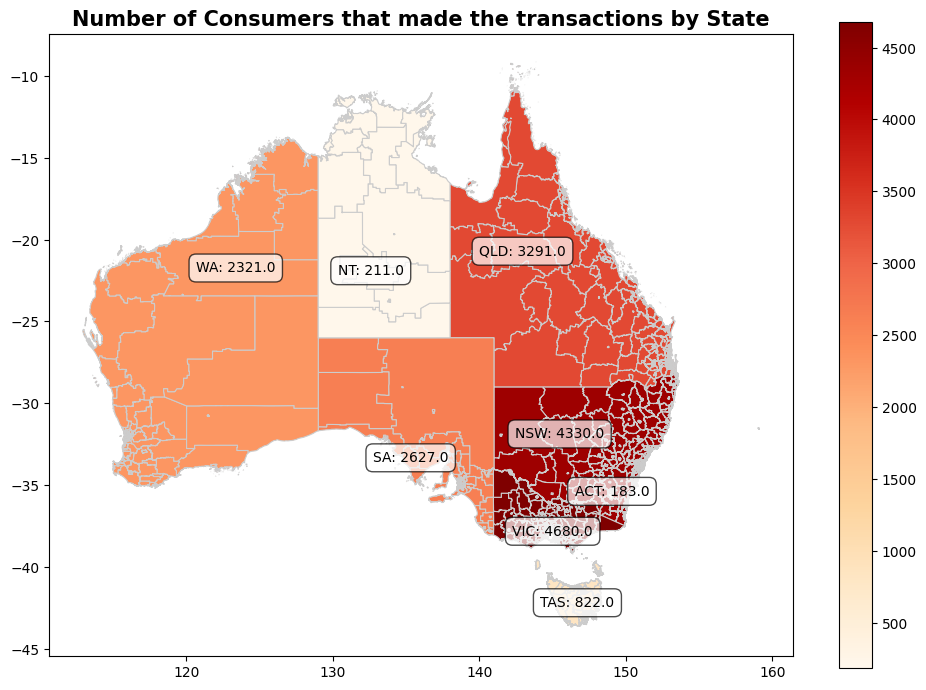

In [19]:
plot_and_save_consumers_per_transaction_per_state(join_consumer_counts_state, "Number of Consumers that made the transactions by State", '.'+CONSUMER_PER_TRANSACTION_PER_STATE_PLOT_PATH)

### Geovisualisation - Average dollar value by state

In [20]:
# Convert PySpark DataFrame to Pandas DataFrame for the average dollar value by state
# Calculate average dollar value rounded to two decimal places by state
average_dollar_by_state = transactions.groupBy(STATE).agg(round(avg(DOLLAR_VALUE), 2).alias('avg_dollar_value')).toPandas()
average_dollar_by_state.head()

,state,avg_dollar_value
0,NT,168.13
1,ACT,168.25
2,SA,166.10
3,TAS,166.99
4,WA,165.78
5,QLD,158.31
6,VIC,158.54
7,NSW,158.48


In [21]:
# Merge the average dollar value data with the shapefile
merged_avg_dollar_state = shape_file.merge(average_dollar_by_state, on = STATE, how = LEFT_JOIN)
merged_avg_dollar_state.head()

,sa2_code,sa2_name,state,geometry,avg_dollar_value
0,101021007,Braidwood,NSW,"POLYGON ((149.58424 -35.44426, 149.58444 -35.4...",166.46
1,101021008,Karabar,NSW,"POLYGON ((149.21899 -35.36738, 149.21800 -35.3...",166.46
2,101021009,Queanbeyan,NSW,"POLYGON ((149.21326 -35.34325, 149.21619 -35.3...",166.46
3,101021010,Queanbeyan - East,NSW,"POLYGON ((149.24034 -35.34781, 149.24024 -35.3...",166.46
4,101021012,Queanbeyan West - Jerrabomberra,NSW,"POLYGON ((149.19572 -35.36126, 149.19970 -35.3...",166.46


/var/folders/w7/gvb56kl110513ygmm9qm6_500000gn/T/ipykernel_31492/761821500.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, state, sa2_code, label in zip(data.geometry.centroid.x, data.geometry.centroid.y, data["state"], data["sa2_code"], data["avg_dollar_value"]):


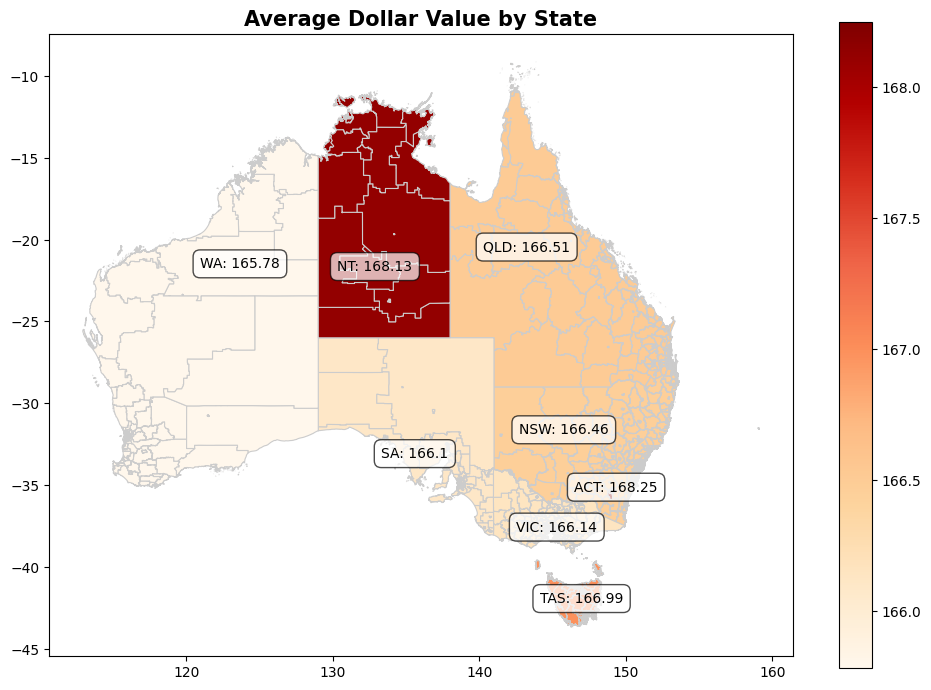

In [26]:
plot_average_dollar_value_by_state(merged_avg_dollar_state, 'Average Dollar Value by State', '.'+AVERAGE_DOLLAR_VALUE_BY_STATE_PLOT_PATH)

In [18]:
# Calculate gender counts per state
# Calculate gender counts per state
gender_counts_per_state = transactions.groupBy('state', 'gender').agg(count('user_id').alias('count'))
gender_counts_per_state 

23/10/05 10:43:40 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


state,gender,count
WA,Undisclosed,208357
QLD,Male,2050841
SA,Undisclosed,285439
TAS,Female,417159
WA,Male,964567
TAS,Undisclosed,107399
ACT,Female,154333
VIC,Male,2027612
ACT,Male,144756
NSW,Female,2191101


In [19]:
# Assuming you have a PySpark DataFrame named 'transactions' with 'state' and 'gender' columns
# Calculate gender counts per state
gender_counts_per_state = transactions.groupBy('state', 'gender') \
    .agg(count('user_id').alias('count'))

# Pivot the data to get the the columns for the number of each type of gender
gender_counts_per_state  = gender_counts_per_state.groupBy('state').pivot('gender', ['Male', 'Female', 'Undisclosed']).sum('count')

# Calculate the total count per state
gender_counts_per_state = gender_counts_per_state.withColumn('Total', gender_counts_per_state['Male'] + gender_counts_per_state['Female'] + gender_counts_per_state['Undisclosed'])

# Calculate the proportion of males, females, and undisclosed
gender_counts_per_state = gender_counts_per_state.withColumn('male_proportion', round(((col('Male') / col('Total')) * 100), 2)) \
    .withColumn('female_proportion', round(((col('Female') / col('Total')) * 100), 2)) \
    .withColumn('undisclosed_proportion', round(((col('Undisclosed') / col('Total')) * 100), 2))


In [20]:
gender_counts_per_state

state,Male,Female,Undisclosed,Total,male_proportion,female_proportion,undisclosed_proportion
NT,176324,148455,24468,349247,50.49,42.51,7.01
ACT,144756,154333,38528,337617,42.88,45.71,11.41
SA,1068044,1103626,285439,2457109,43.47,44.92,11.62
TAS,443838,417159,107399,968396,45.83,43.08,11.09
WA,964567,894753,208357,2067677,46.65,43.27,10.08
QLD,2050841,1978116,463074,4492031,45.66,44.04,10.31
VIC,2027612,2041790,438749,4508151,44.98,45.29,9.73
NSW,2218863,2191101,490562,4900526,45.28,44.71,10.01


In [21]:
# Merge the gender distribution data with the shape file
merged_gender_data = shape_file.merge(gender_counts_per_state.toPandas(), on='state', how='left')
merged_gender_data.head()

,sa2_code,sa2_name,state,geometry,Male,Female,Undisclosed,Total,male_proportion,female_proportion,undisclosed_proportion
0,101021007,Braidwood,NSW,"POLYGON ((149.58424 -35.44426, 149.58444 -35.4...",2218863.0,2191101.0,490562.0,4900526.0,45.28,44.71,10.01
1,101021008,Karabar,NSW,"POLYGON ((149.21899 -35.36738, 149.21800 -35.3...",2218863.0,2191101.0,490562.0,4900526.0,45.28,44.71,10.01
2,101021009,Queanbeyan,NSW,"POLYGON ((149.21326 -35.34325, 149.21619 -35.3...",2218863.0,2191101.0,490562.0,4900526.0,45.28,44.71,10.01
3,101021010,Queanbeyan - East,NSW,"POLYGON ((149.24034 -35.34781, 149.24024 -35.3...",2218863.0,2191101.0,490562.0,4900526.0,45.28,44.71,10.01
4,101021012,Queanbeyan West - Jerrabomberra,NSW,"POLYGON ((149.19572 -35.36126, 149.19970 -35.3...",2218863.0,2191101.0,490562.0,4900526.0,45.28,44.71,10.01


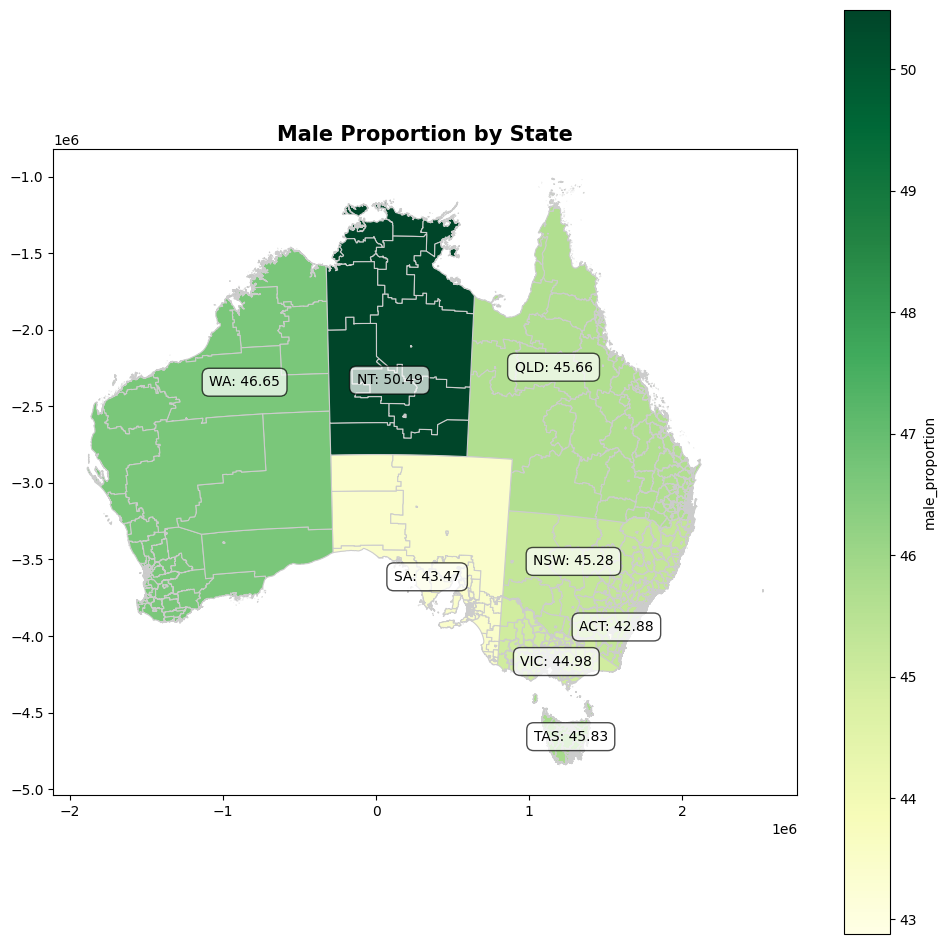

In [22]:
# Plot the choropleth map for male proportion
plot_gender_distribution_by_state(merged_gender_data, "Male Proportion by State", 'male_proportion')


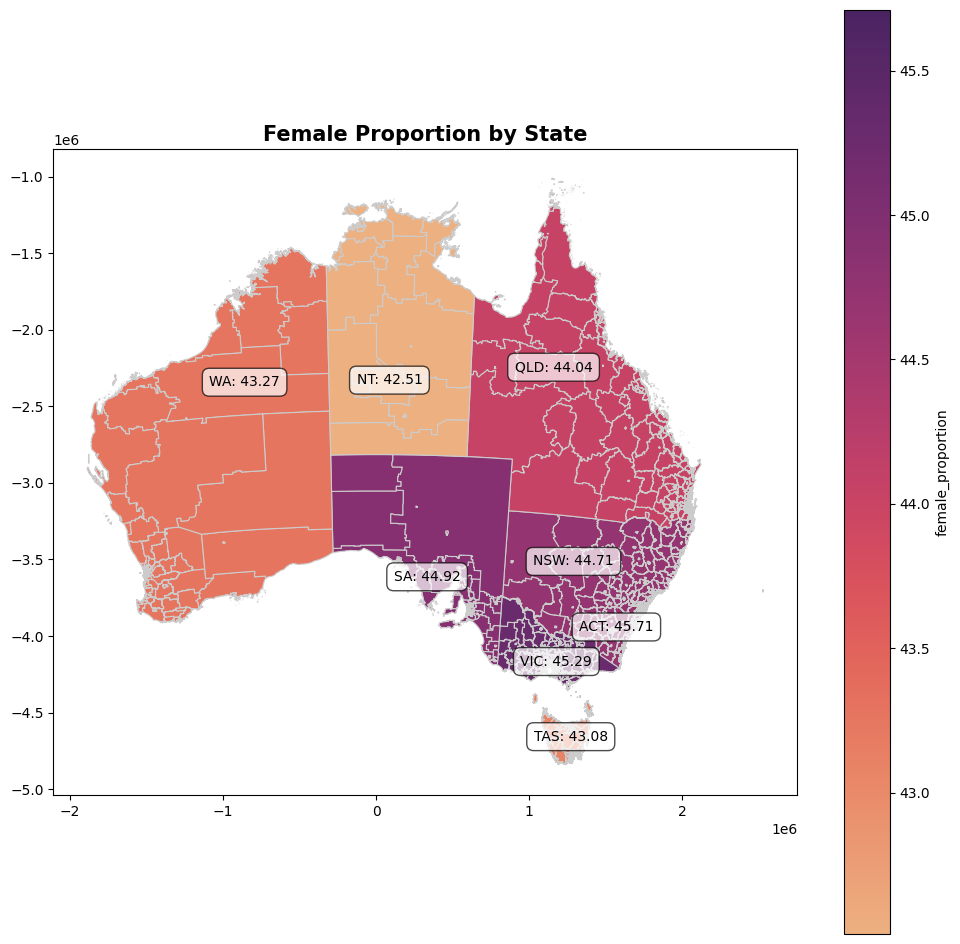

In [23]:
# Plot the choropleth map for female proportion
plot_gender_distribution_by_state(merged_gender_data, "Female Proportion by State", 'female_proportion')

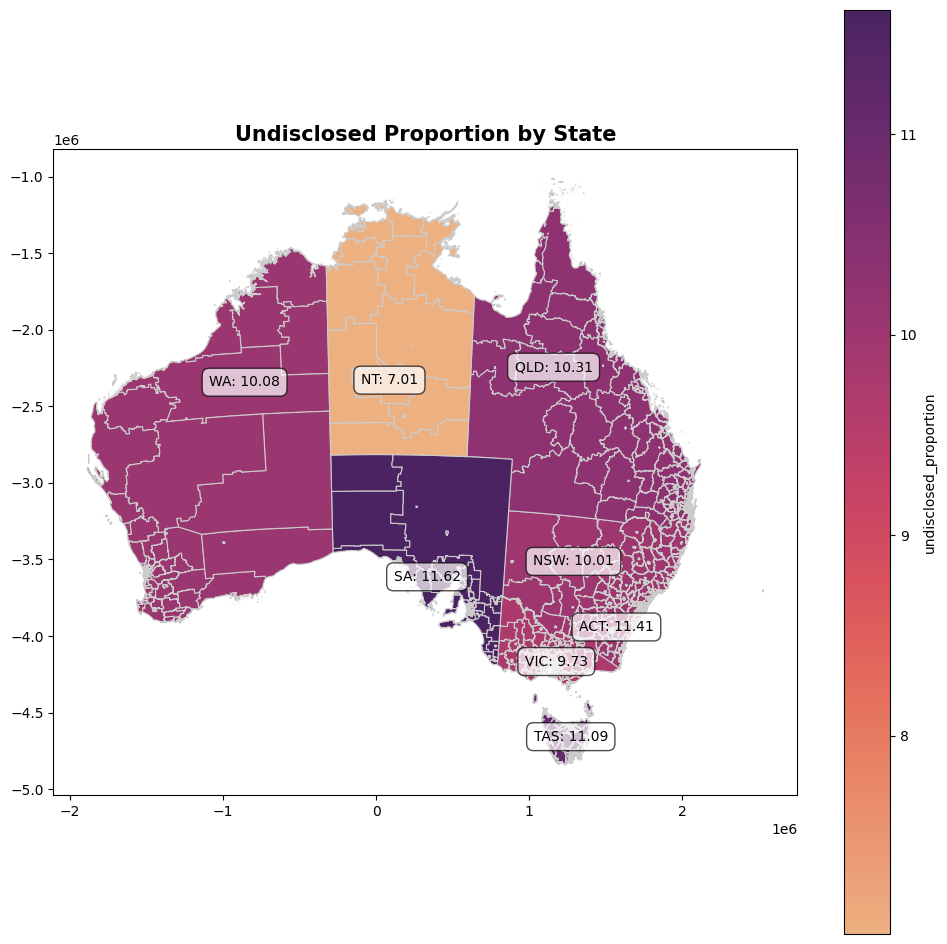

In [24]:
# Plot the choropleth map for undisclosed proportion
plot_gender_distribution_by_state(merged_gender_data, "Undisclosed Proportion by State", 'undisclosed_proportion')